In [14]:
from cnn_model import train_and_test
import pandas as pd
from itertools import product
import pickle
from time import time
import matplotlib.pyplot as plt

In [2]:
# save expt results to a pickle file
save_path = 'expt.pkl'
# save function to save variables to disk
def save(x):
    with open(save_path, 'wb') as f:
        pickle.dump(x, f)

# load function to load variable from disk
def load():
    x = False
    try:
        with open(save_path, 'rb') as f:
            x = pickle.load(f)
    except Exception as e:
        print('Not found')
    return x

In [3]:
# expt settings
batch_size_list = [256, 128, 64, 32]
dropout_list = [False, True]
relu_list = [False, True]

In [4]:
# create all combinations
combos = list(product(batch_size_list, dropout_list, relu_list))
len(combos)

16

In [5]:
# load expt data
# we use this to resume the expt
results = load() or {}

In [6]:
# run expt for all combinations
for b, d, r in combos:
    key = '_'.join([str(b),str(r),str(d)])

    # if expt already done, do not do it again
    if key in results.keys():
        continue
    
    print(f'doing expt: (batch_size={b}, use_relu={r}, use_dropout={d})')
    start_time = time();
    score, history = train_and_test(batch_size=b, relu_activation=r, use_dropout=d)
    time_taken = time() - start_time;
    r = [b, d, r, time_taken, score]
    results[key] = r
    # save expt results to pickle
    save(results)

doing expt: (batch_size=256, use_relu=False, use_dropout=False)


Epoch [4/5]; batch: 205 => loss: 0.074, val_loss: 0.098, val_acc: 0.969: 100%|██████████| 5/5 [06:55<00:00, 83.07s/it]


doing expt: (batch_size=256, use_relu=True, use_dropout=False)


Epoch [4/5]; batch: 205 => loss: 0.010, val_loss: 0.024, val_acc: 0.992: 100%|██████████| 5/5 [06:52<00:00, 82.57s/it]


doing expt: (batch_size=256, use_relu=False, use_dropout=True)


Epoch [4/5]; batch: 205 => loss: 0.455, val_loss: 0.393, val_acc: 0.848: 100%|██████████| 5/5 [06:52<00:00, 82.46s/it]


doing expt: (batch_size=256, use_relu=True, use_dropout=True)


Epoch [4/5]; batch: 205 => loss: 0.279, val_loss: 0.182, val_acc: 0.906: 100%|██████████| 5/5 [06:52<00:00, 82.46s/it]


doing expt: (batch_size=128, use_relu=False, use_dropout=False)


Epoch [4/5]; batch: 410 => loss: 0.018, val_loss: 0.052, val_acc: 0.992: 100%|██████████| 5/5 [08:05<00:00, 97.02s/it]


doing expt: (batch_size=128, use_relu=True, use_dropout=False)


Epoch [4/5]; batch: 410 => loss: 0.001, val_loss: 0.012, val_acc: 0.992: 100%|██████████| 5/5 [08:15<00:00, 99.05s/it] 


doing expt: (batch_size=128, use_relu=False, use_dropout=True)


Epoch [4/5]; batch: 410 => loss: 0.260, val_loss: 0.270, val_acc: 0.891: 100%|██████████| 5/5 [08:28<00:00, 101.78s/it]


doing expt: (batch_size=128, use_relu=True, use_dropout=True)


Epoch [4/5]; batch: 410 => loss: 0.095, val_loss: 0.170, val_acc: 0.922: 100%|██████████| 5/5 [08:30<00:00, 102.16s/it]


doing expt: (batch_size=64, use_relu=False, use_dropout=False)


Epoch [4/5]; batch: 820 => loss: 0.012, val_loss: 0.043, val_acc: 0.984: 100%|██████████| 5/5 [09:08<00:00, 109.64s/it]


doing expt: (batch_size=64, use_relu=True, use_dropout=False)


Epoch [4/5]; batch: 820 => loss: 0.002, val_loss: 0.015, val_acc: 0.984: 100%|██████████| 5/5 [08:46<00:00, 105.24s/it]


doing expt: (batch_size=64, use_relu=False, use_dropout=True)


Epoch [4/5]; batch: 820 => loss: 0.188, val_loss: 0.205, val_acc: 0.906: 100%|██████████| 5/5 [08:39<00:00, 103.82s/it]


doing expt: (batch_size=64, use_relu=True, use_dropout=True)


Epoch [4/5]; batch: 820 => loss: 0.111, val_loss: 0.165, val_acc: 0.891: 100%|██████████| 5/5 [08:33<00:00, 102.70s/it]


doing expt: (batch_size=32, use_relu=False, use_dropout=False)


Epoch [4/5]; batch: 1640 => loss: 0.006, val_loss: 0.027, val_acc: 1.000: 100%|██████████| 5/5 [08:55<00:00, 107.19s/it]


doing expt: (batch_size=32, use_relu=True, use_dropout=False)


Epoch [4/5]; batch: 1640 => loss: 0.002, val_loss: 0.002, val_acc: 1.000: 100%|██████████| 5/5 [08:55<00:00, 107.05s/it]


doing expt: (batch_size=32, use_relu=False, use_dropout=True)


Epoch [4/5]; batch: 1640 => loss: 0.225, val_loss: 0.402, val_acc: 0.812: 100%|██████████| 5/5 [09:37<00:00, 115.48s/it]


doing expt: (batch_size=32, use_relu=True, use_dropout=True)


Epoch [4/5]; batch: 1640 => loss: 0.168, val_loss: 0.288, val_acc: 0.844: 100%|██████████| 5/5 [09:29<00:00, 113.83s/it]


In [7]:
columns = ['batch_size','use_dropout','use_relu', 'time_taken', 'score']
rows = []

for k,v in results.items():
    rows.append(v)

df = pd.DataFrame(rows, columns=columns)

In [8]:
df

,batch_size,use_dropout,use_relu,time_taken,score
0,256,False,False,436.532196,0.984675
1,256,False,True,432.602508,0.994802
2,256,True,False,435.226207,0.964754
3,256,True,True,432.899779,0.988931
4,128,False,False,505.380322,0.988800
5,128,False,True,514.768126,0.993864
6,128,True,False,531.719424,0.978379
7,128,True,True,530.827512,0.989606
8,64,False,False,570.821144,0.992674
9,64,False,True,546.695960,0.995603


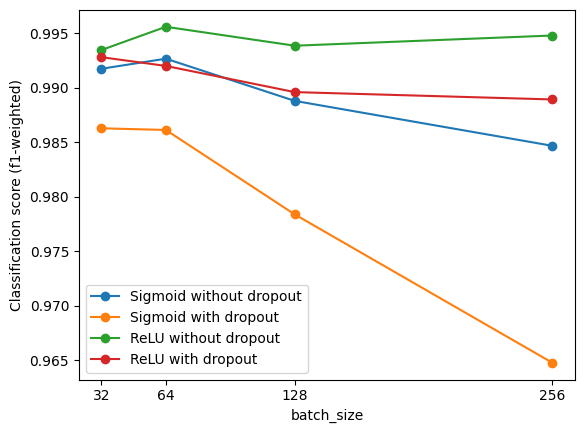

In [21]:
for r,d in list(product( relu_list, dropout_list)):
    d1 = 'with dropout' if d else 'without dropout'
    r1 = 'ReLU' if r else 'Sigmoid'
    df.query(f'use_dropout == {d} & use_relu=={r}').set_index('batch_size').score.plot(label=f'{r1} {d1}', marker='o')

plt.xticks(batch_size_list)
plt.ylabel('Classification score (f1-weighted)')
plt.legend();

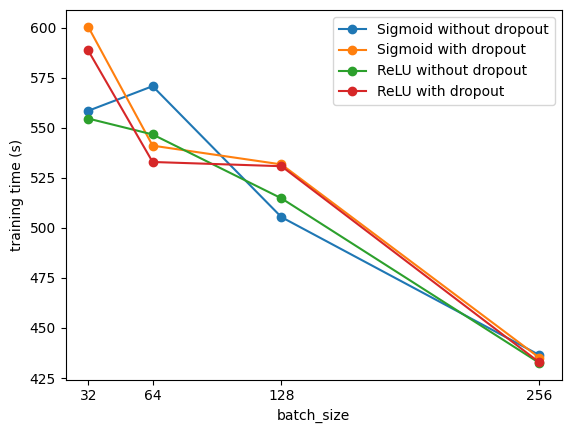

In [22]:
for r,d in list(product( relu_list, dropout_list)):
    d1 = 'with dropout' if d else 'without dropout'
    r1 = 'ReLU' if r else 'Sigmoid'
    df.query(f'use_dropout == {d} & use_relu=={r}').set_index('batch_size').time_taken.plot(label=f'{r1} {d1}', marker='o')

plt.xticks(batch_size_list)
plt.ylabel('training time (s)')
plt.legend();